<a href="https://colab.research.google.com/github/myredex/ds_tutorials/blob/master/01_data_scaling_visualy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scaling

## Most common data scaling techniques

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

## Generate toy dataset

In [ ]:
df = pd.DataFrame({"col1":np.random.normal(12, 4, size=100),   # Normal distribution
                   "col2":np.random.gamma(2, 50, size=100),    # Gamma distribution (The key point is NOT normal)
                   "col3":np.append(np.random.gamma(2, 2, size=99), 100), # Not normal distribution with outlier
                   "class":np.random.randint(2, 100)})
df

,col1,col2,col3,class
0,8.821772,34.620471,13.418624,17
1,6.820058,25.875702,2.696301,17
2,11.461321,66.095456,4.293590,17
3,10.037667,59.179750,0.442512,17
4,6.243136,137.414894,1.258480,17
...,...,...,...,...
95,15.184194,165.238323,4.553148,17
96,12.400001,34.952852,3.840853,17
97,10.441327,209.596040,1.410698,17
98,13.421701,93.054380,10.562179,17


## How scaling works

In [ ]:
import matplotlib.pyplot as plt

def plot_column(df, col_name, scaled_array):
  plt.figure(figsize=(7, 7))
  plt.subplot(2, 2, 1)
  plt.hist(df[col_name], bins=20)
  plt.title(f"Original column {col_name}")

  plt.subplot(2, 2, 2)
  plt.hist(scaled_array, bins=20)
  plt.title(f"Scaled column {col_name}")

  plt.subplot(2, 2, 3)
  plt.boxplot(df[col_name])
  plt.title(f"Original column {col_name}")

  plt.subplot(2, 2, 4)
  plt.boxplot(scaled_array)
  plt.title(f"Scaled column {col_name}")
  plt.show()


## Standard Scaler

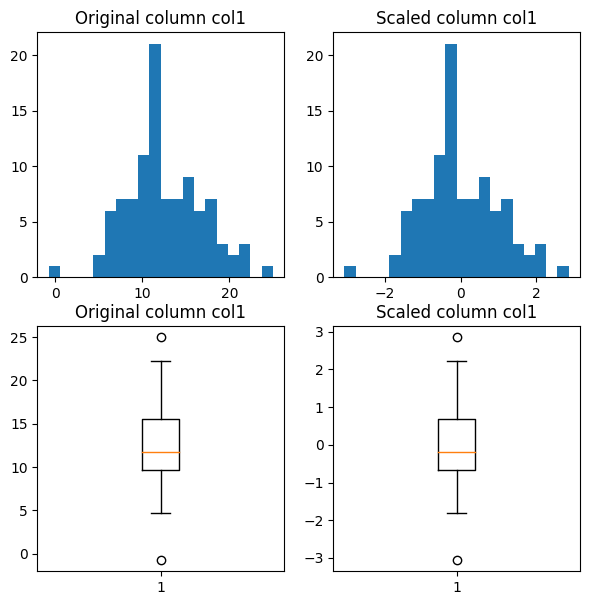

In [ ]:
normalized_col1 = StandardScaler().fit_transform(df["col1"].copy().values.reshape(-1,1))
plot_column(df, "col1", normalized_col1)

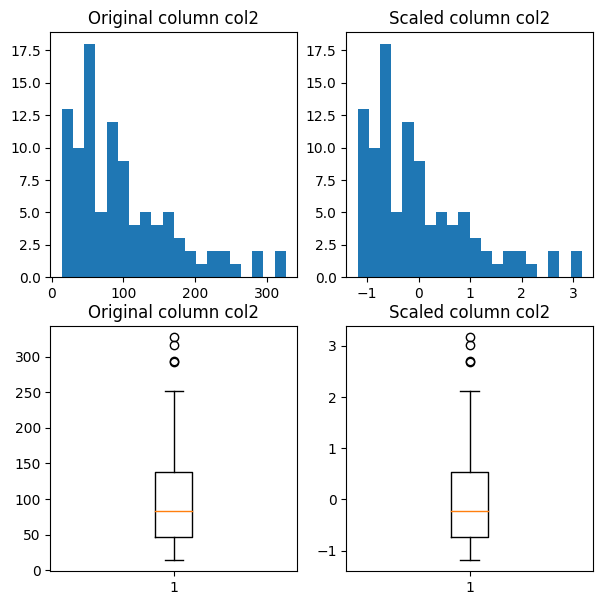

In [ ]:
normalized_col2 = StandardScaler().fit_transform(df["col2"].copy().values.reshape(-1,1))
plot_column(df, "col2", normalized_col2)

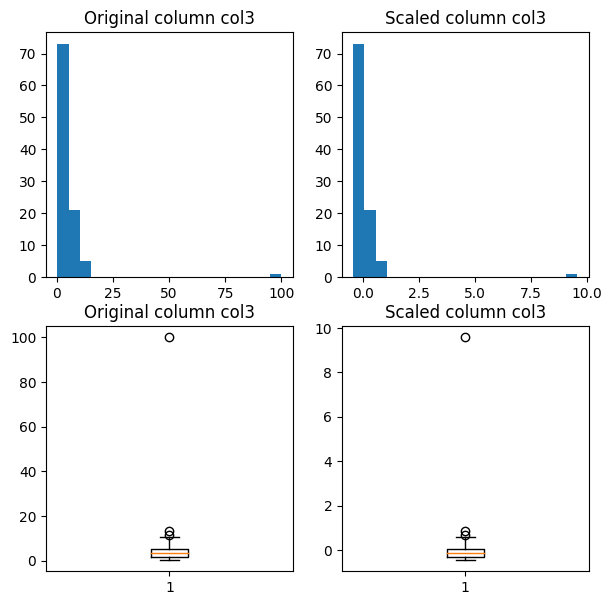

In [ ]:
normalized_col3 = StandardScaler().fit_transform(df["col3"].copy().values.reshape(-1,1))
plot_column(df, "col3", normalized_col3)

## MinMax Scaler

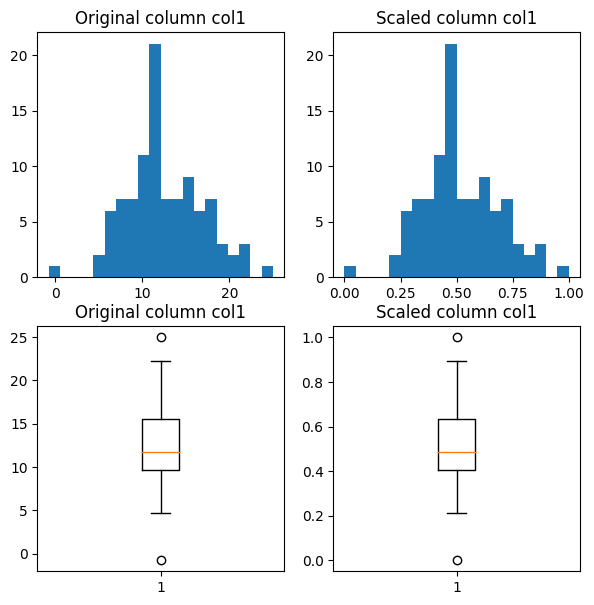

In [ ]:
minmax_col1 = MinMaxScaler().fit_transform(df["col1"].copy().values.reshape(-1,1))
plot_column(df, "col1", minmax_col1)

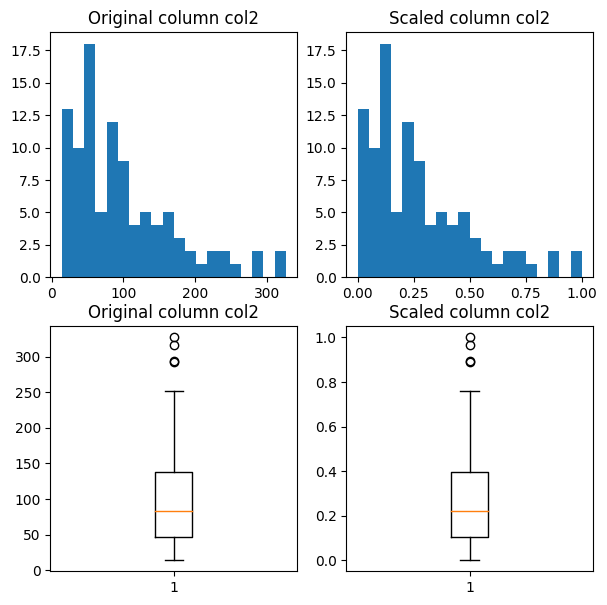

In [ ]:
minmax_col2 = MinMaxScaler().fit_transform(df["col2"].copy().values.reshape(-1,1))
plot_column(df, "col2", minmax_col2)

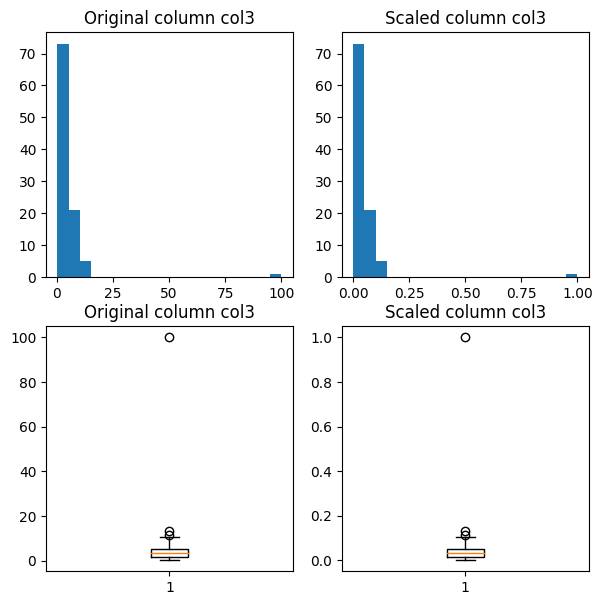

In [ ]:
minmax_col3 = MinMaxScaler().fit_transform(df["col3"].copy().values.reshape(-1,1))
plot_column(df, "col3", minmax_col3)

## Winsorizing
Type of MinMax scaling but we cut off outliers first

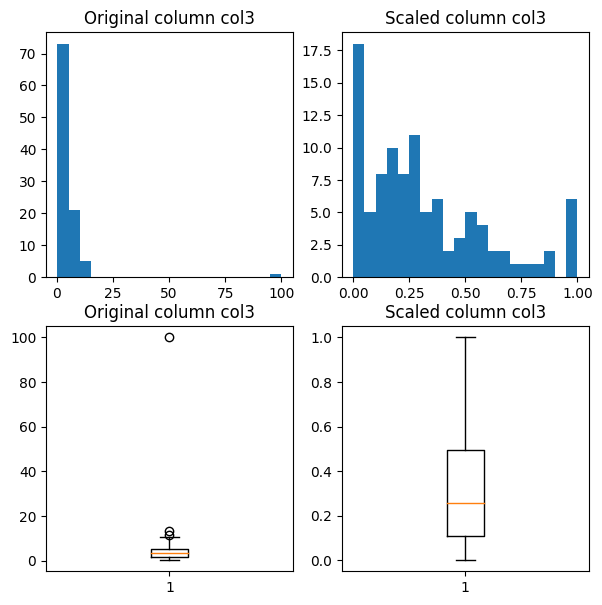

In [ ]:
#set limits as 5th & 95th percentile
df["col3_w"] = pd.Series(winsorize(df["col3"], limits=[0.05, 0.05]))

# After that use MinMax Scaler
winzor_col3 = MinMaxScaler().fit_transform(df["col3_w"].copy().values.reshape(-1,1))
plot_column(df, "col3", winzor_col3)

In [ ]:
df['col3_w']

0     10.240375
1      2.696301
2      4.293590
3      0.806688
4      1.258480
        ...    
95     4.553148
96     3.840853
97     1.410698
98    10.240375
99    10.240375
Name: col3_w, Length: 100, dtype: float64

## Robust Scaler

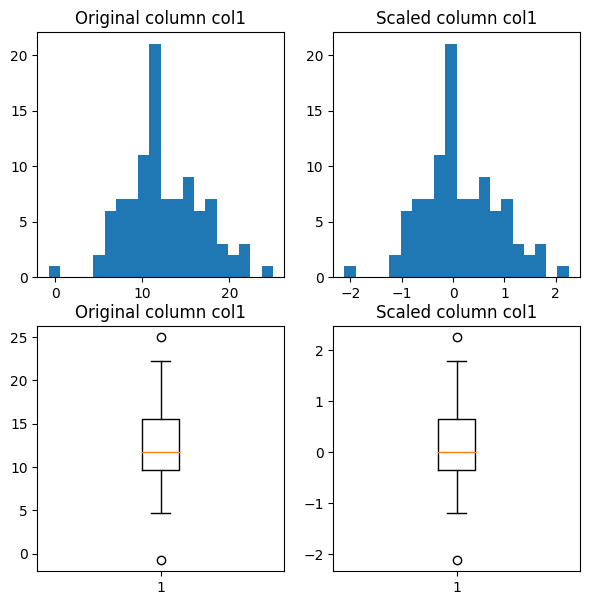

In [ ]:
robust_col1 = RobustScaler().fit_transform(df["col1"].copy().values.reshape(-1,1))
plot_column(df, "col1", robust_col1)

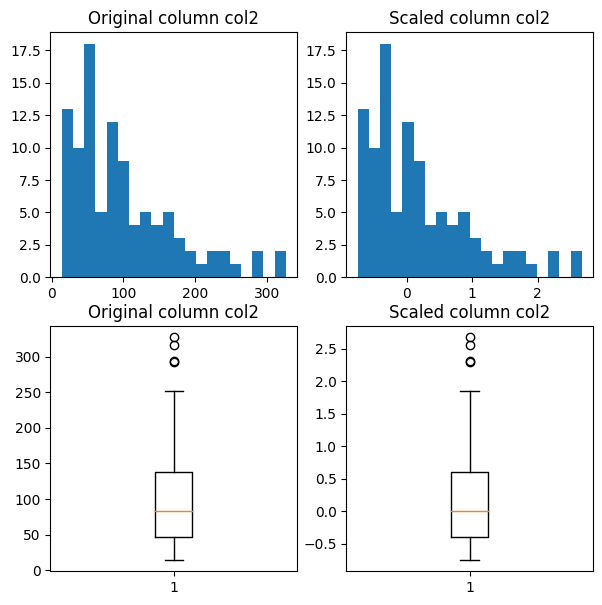

In [ ]:
robust_col2 = RobustScaler().fit_transform(df["col2"].copy().values.reshape(-1,1))
plot_column(df, "col2", robust_col2)

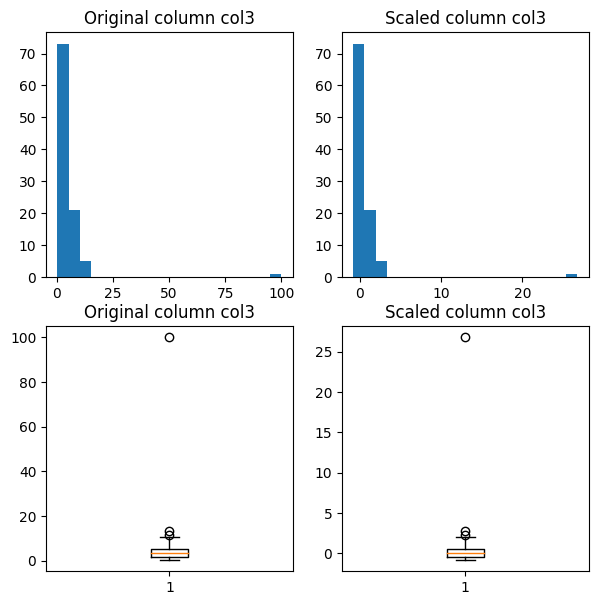

In [ ]:
robust_col3 = RobustScaler().fit_transform(df["col3"].copy().values.reshape(-1,1))
plot_column(df, "col3", robust_col3)

## What to do and how to deal with it




1.   Create Base line model with any loss function or any quality metric
2.   Get result of the quality metric without any scaling
3.   Try different scaling techniques and see to results (can make your model better or worse)
4.   Basic rules: Normalstribution - (MinMax, Standard), Other types - (MinMax), Any with outliers = (MinMax, Robust)
5.   All depends of your exact dataset only step by step experiments will give you best answer!!!!